# Morphological Operations

Download images for this notebook [here](https://github.com/tim3in/image-processing/tree/main/images/morphological_op).

## Import Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import (erosion, dilation, opening, closing,
                                white_tophat, black_tophat, skeletonize,
                                thin, square, rectangle, diamond, disk, star,
                                octagon, ellipse)
from skimage import data
from skimage.filters import threshold_otsu
from skimage import io
from skimage import color

## Input Images

We use following images for our example.

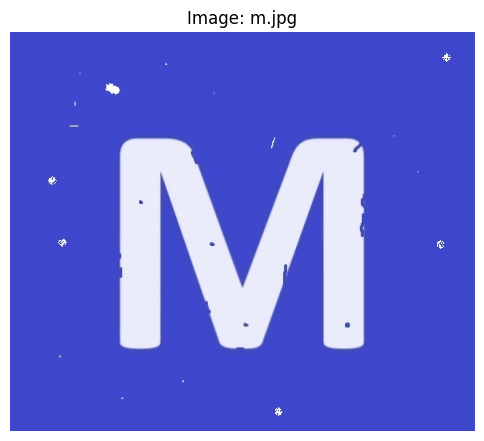

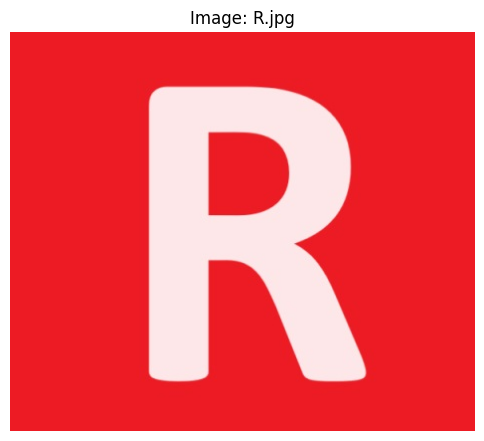

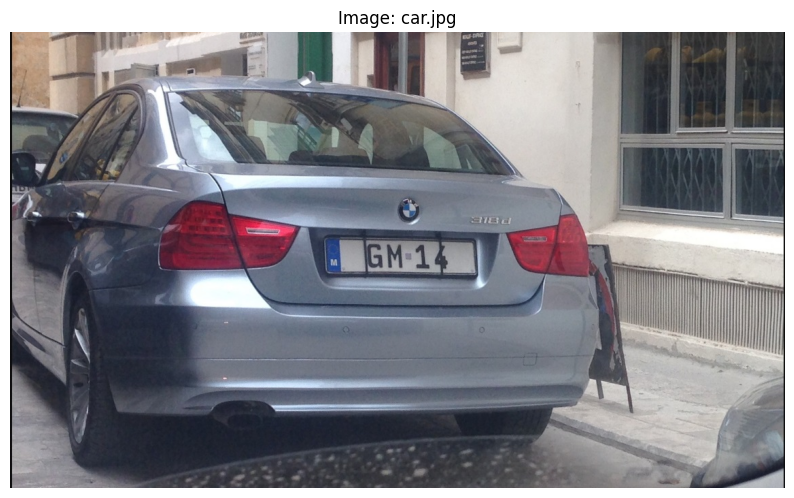

In [43]:
# Load the images
image_m = io.imread('m.jpg')
image_r = io.imread('R.jpg')
image_car = io.imread('car.jpg')

# Display the 'm.jpg' image
plt.figure(figsize=(6, 6))
plt.imshow(image_m, cmap='gray')
plt.title('Image: m.jpg')
plt.axis('off')
plt.show()

# Display the 'R.jpg' image
plt.figure(figsize=(6, 6))
plt.imshow(image_r, cmap='gray')
plt.title('Image: R.jpg')
plt.axis('off')
plt.show()

# Display the 'car.jpg' image
plt.figure(figsize=(10, 6))
plt.imshow(image_car)
plt.title('Image: car.jpg')
plt.axis('off')
plt.show()


## Structuring Elements

*   **square(5)**: Creates a 5x5 square structuring element.
*   **rectangle(3, 5)**: Creates a rectangular structuring element with dimensions 3x5.
*   **diamond(3)**: Generates a diamond-shaped structuring element with a radius of 3.
*   **disk(5)**: Creates a disk-shaped (circular) structuring element with a radius of 5.
*   **star(5)**: Generates a star-shaped structuring element with a radius of 5.
*   **octagon(3, 2)**: Creates an octagonal structuring element with two different radii.
*   **ellipse(5, 3)**: Generates an elliptical structuring element with semi-major axis 5 and semi-minor axis 3.

In [38]:
# Define the structuring elements
structuring_elements = {
    "Square (5x5)": square(5),
    "Rectangle (3x5)": rectangle(3, 5),
    "Diamond (3)": diamond(3),
    "Disk (5)": disk(5),
    "Star (5)": star(5),
    "Octagon (3, 2)": octagon(3, 2),
    "Ellipse (5, 3)": ellipse(5, 3)
}

# Print the structuring elements as text
for name, se in structuring_elements.items():
    print(f"{name}:\n{se}\n")


Square (5x5):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Rectangle (3x5):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Diamond (3):
[[0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]]

Disk (5):
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]

Star (5):
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 

## Erosion

In [44]:
# Convert image to grayscale
gray_image = color.rgb2gray(image_m)

# Convert grayscale image to binary
thresh = 0.5  # Manually set threshold for demonstration
binary_image = gray_image > thresh

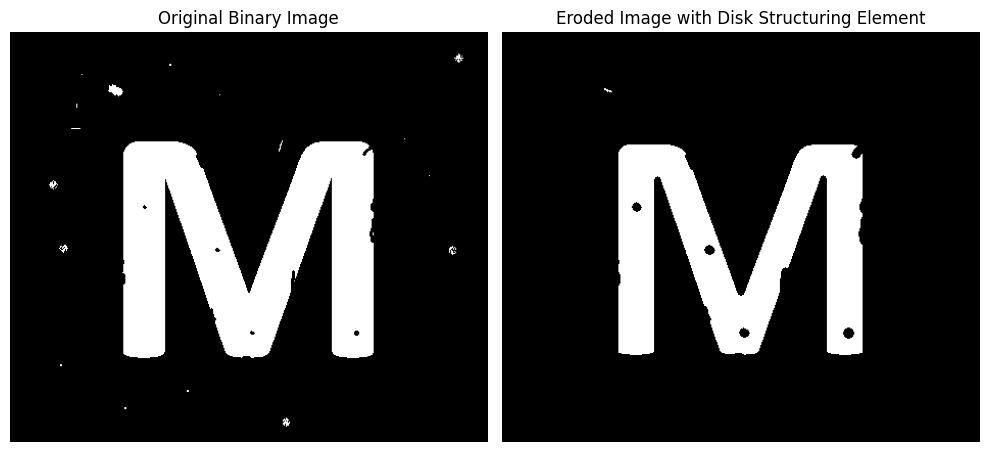

In [45]:
# Define a disk-shaped 7x7 structuring element
selem = disk(3)

# Apply erosion
eroded_image = erosion(binary_image, selem)

# Display the original and eroded images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

ax[1].imshow(eroded_image, cmap='gray')
ax[1].set_title('Eroded Image with Disk Structuring Element')
ax[1].axis('off')

plt.tight_layout()
plt.show()


## Dilation

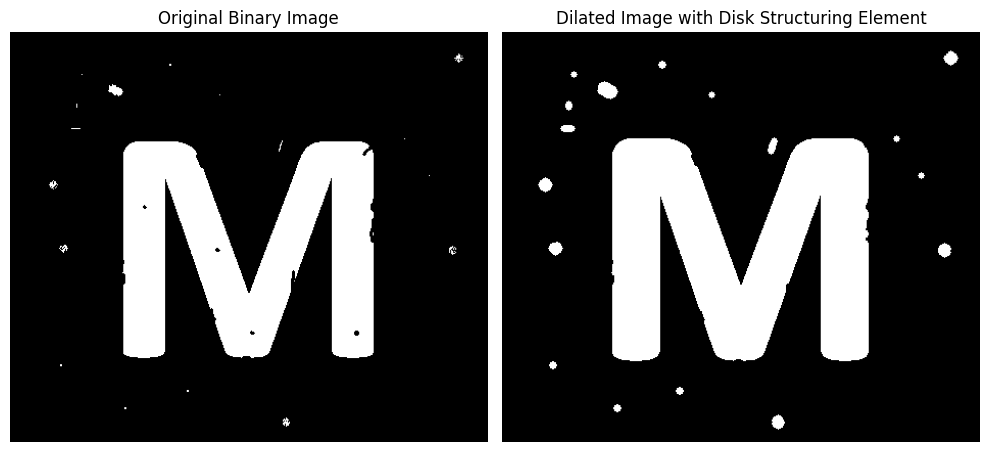

In [46]:
# Define a disk-shaped 7x7 structuring element
selem = disk(3)

# Apply dilation
dilated_image = dilation(binary_image, selem)

# Display the original and dilated images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

ax[1].imshow(dilated_image, cmap='gray')
ax[1].set_title('Dilated Image with Disk Structuring Element')
ax[1].axis('off')

plt.tight_layout()
plt.show()


## Opening

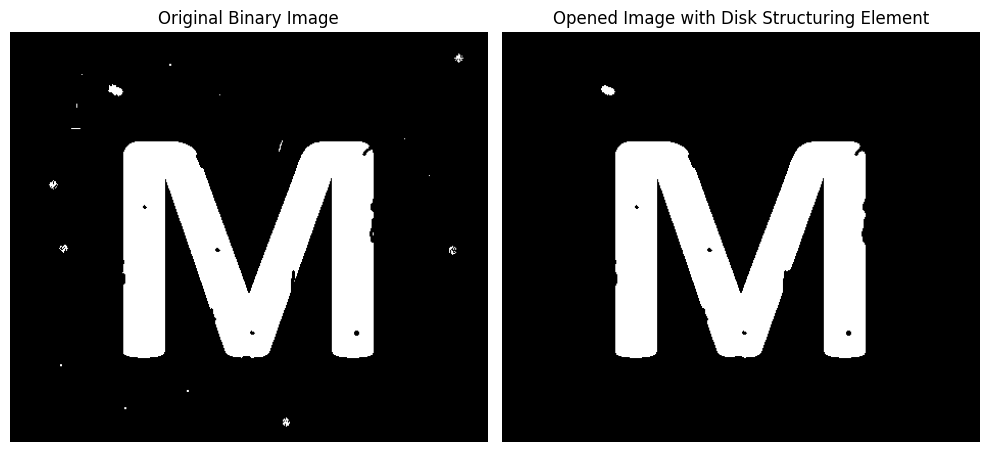

In [47]:
# Define a disk-shaped structuring element
selem = disk(3)

# Display the original and opened images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

# Apply opening (erosion followed by dilation)
opened_image = opening(binary_image, selem)

ax[1].imshow(opened_image, cmap='gray')
ax[1].set_title('Opened Image with Disk Structuring Element')
ax[1].axis('off')

plt.tight_layout()
plt.show()


## Closing

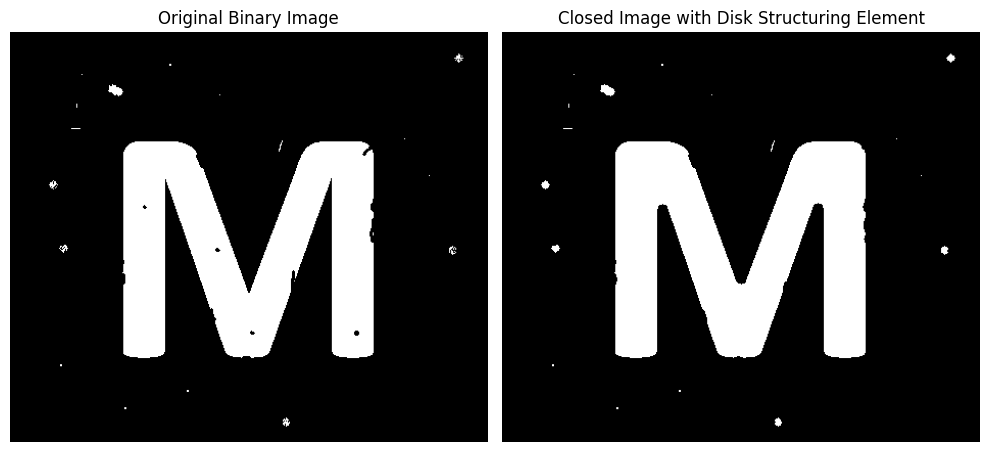

In [48]:
# Define a disk-shaped structuring element
selem = disk(5)

# Apply closing (dilation followed by erosion)
closed_image = closing(binary_image, selem)

# Display the original and closed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

ax[1].imshow(closed_image, cmap='gray')
ax[1].set_title('Closed Image with Disk Structuring Element')
ax[1].axis('off')

plt.tight_layout()
plt.show()


## Top-Hat Transform

*   White Top-Hat Transform
*   Black Top-Hat Transform

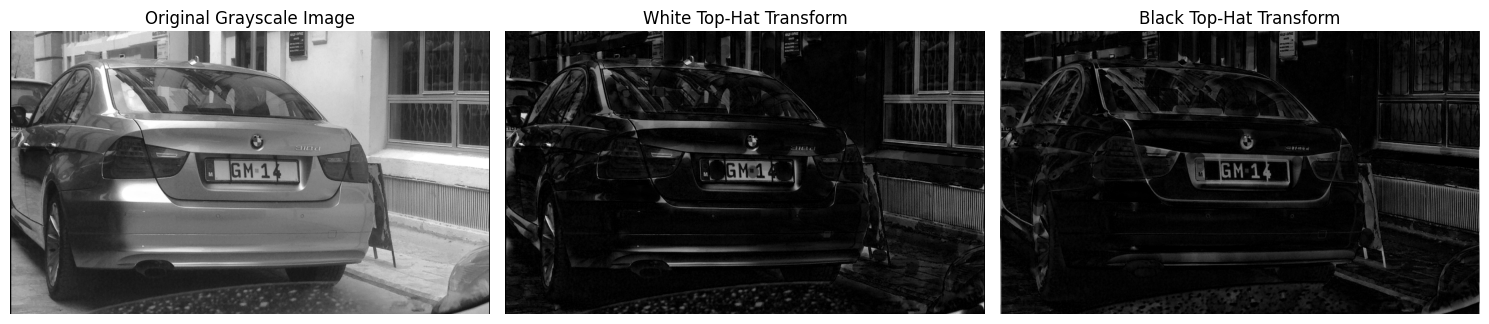

In [49]:
# Convert image to grayscale
gray_image = color.rgb2gray(image_car)

# Define a disk-shaped structuring element
selem = disk(12)

# Apply white top-hat transform to enhance small bright features
white_tophat_image = white_tophat(gray_image, selem)

# Apply black top-hat transform to enhance small dark features
black_tophat_image = black_tophat(gray_image, selem)

# Display the original, white top-hat, and black top-hat images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(white_tophat_image, cmap='gray')
ax[1].set_title('White Top-Hat Transform')
ax[1].axis('off')

ax[2].imshow(black_tophat_image, cmap='gray')
ax[2].set_title('Black Top-Hat Transform')
ax[2].axis('off')

plt.tight_layout()
plt.show()


## Skeletonization

In [50]:
# Convert the image to grayscale
gray_image = color.rgb2gray(image_r)

# Binarize the image using Otsu's threshold
threshold = threshold_otsu(gray_image)
binary_image = gray_image > threshold

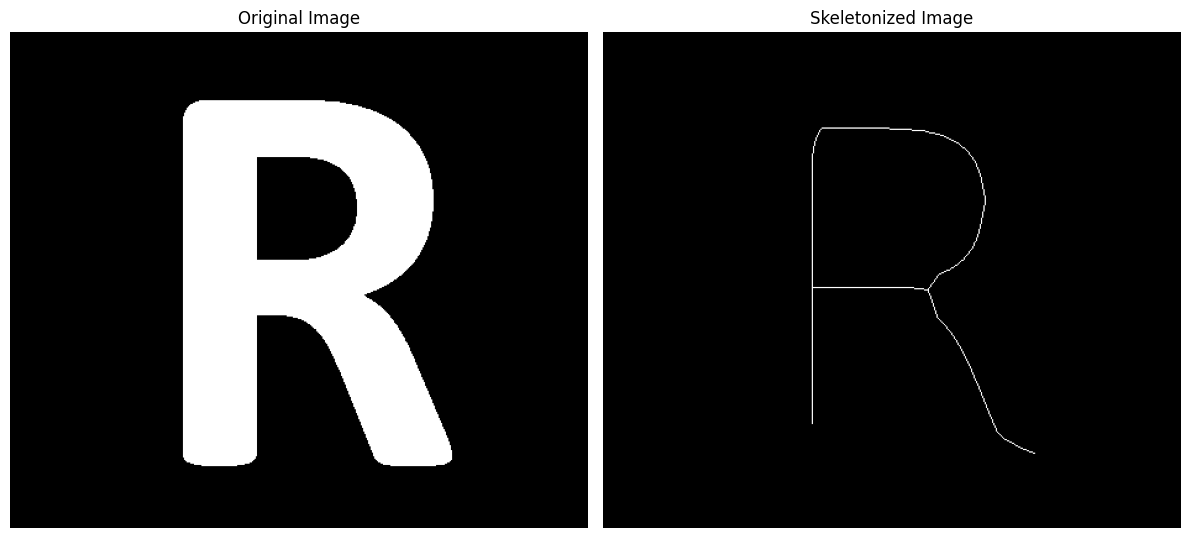

In [51]:
# Perform skeletonization
skeleton = skeletonize(binary_image)

# Display the original and skeletonized images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap='gray')
ax[1].set_title('Skeletonized Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()


## Thinning

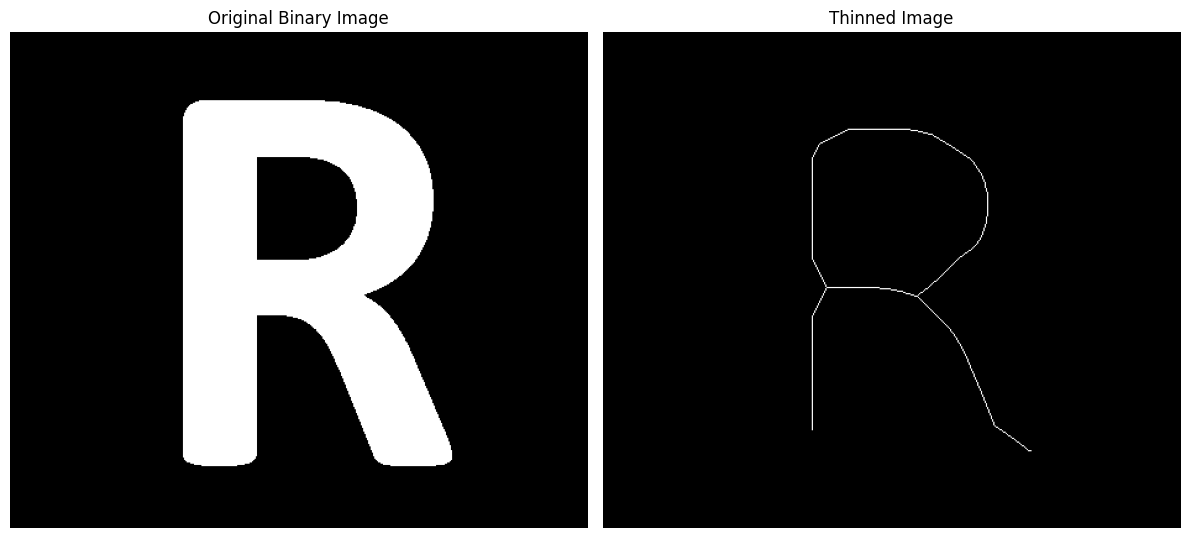

In [52]:
# Display the original and thinned images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

# Perform thinning
thinned_image = thin(binary_image)

ax[1].imshow(thinned_image, cmap='gray')
ax[1].set_title('Thinned Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()
